Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Given Datasets

In [3]:
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

#Reading the data from the datasets
customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

Data in the each datasets

In [4]:
print("Customers Dataset:")
print(customers.info())
print(customers.head(), "\n")

print("Products Dataset:")
print(products.info())
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.info())
print(transactions.head(), "\n")

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductI

Merging Datasets to get complete data in one set.

In [5]:
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, products, on='ProductID')

Checking for missing values

In [6]:
print(data.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


Dataset description

In [7]:
print(data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


Exploratory Data Analysis (EDA)

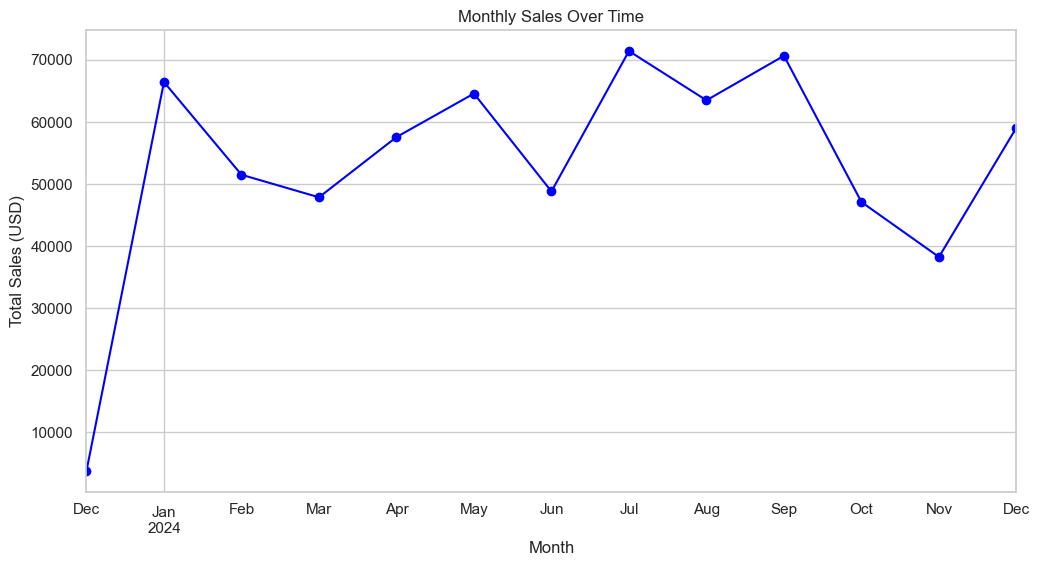

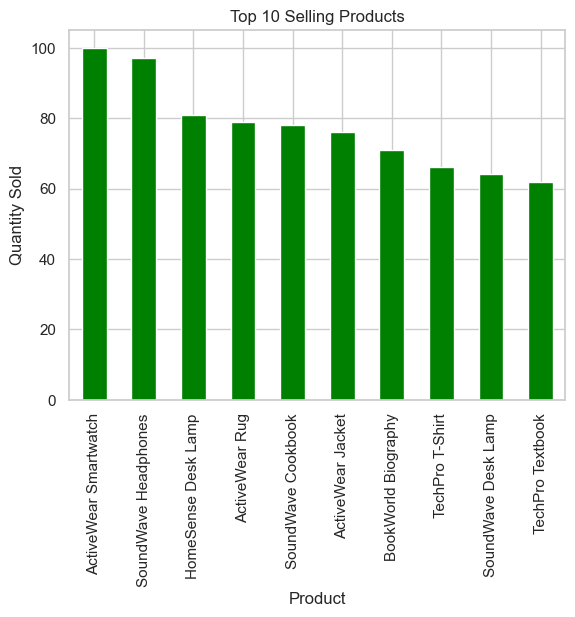

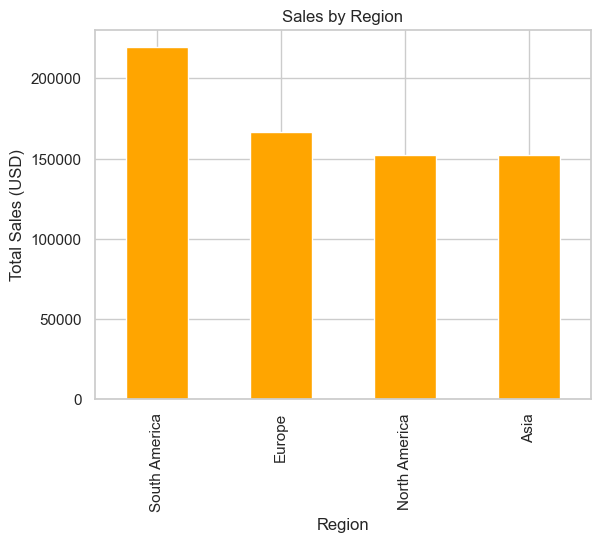

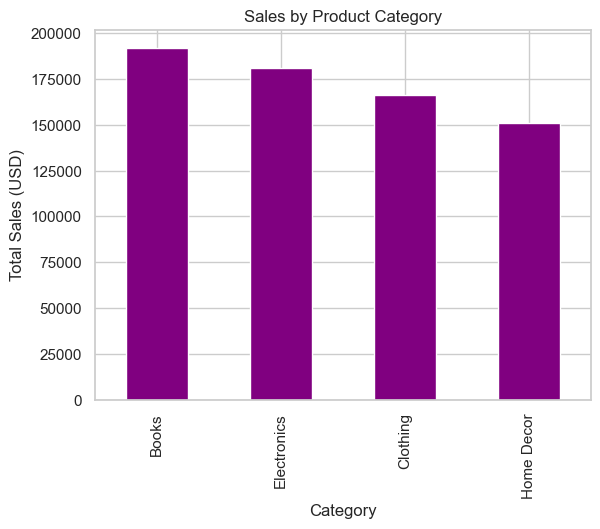

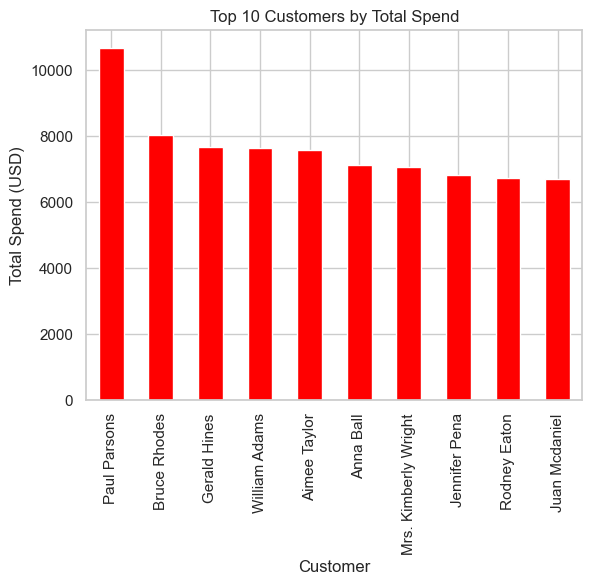

In [8]:
#Setting Visual Style
sns.set(style="whitegrid")

# 1. Transactions over time
plt.figure(figsize=(12, 6))
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['TransactionMonth'] = data['TransactionDate'].dt.to_period('M')
monthly_sales = data.groupby('TransactionMonth')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Over Time', color='blue')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Month')
plt.show()
print("\n")

# 2. Top-selling products
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Selling Products', color='green')
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.show()
print("\n")

# 3. Regional sales distribution
region_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Sales by Region', color='orange')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Region')
plt.show()
print("\n")

# 4. Category-wise sales
category_sales = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Sales by Product Category', color='purple')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Category')
plt.show()
print("\n")

# 5. High-value customers
top_customers = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Total Spend', color='red')
plt.ylabel('Total Spend (USD)')
plt.xlabel('Customer')
plt.show()

Saving all insights

In [9]:
data.to_csv("merged_data.csv", index=False)